In [1]:
import numpy as np
import sys
sys.path.append('../../')
sys.path.append('../../pyfos/')
from pyfos.models.feedforward import build_feedforward
from pyfos.generic.optimizer import gd_optimizer
from pyfos.generic.regularizers import gaus_prior
from functools import partial 
from pyfos.tc.simple import  simple_tc
from pyfos.tc.cv import  cv_tc
from pyfos.hyperoptimizers.random_search import random_optimize
from pyfos.hyperoptimizers.greed_optimize import greed_optimize
import theano
%matplotlib inline
import matplotlib.pylab as plt
import random
import cPickle

WARNING (theano.sandbox.cuda): The cuda backend is deprecated and will be removed in the next release (v0.10).  Please switch to the gpuarray backend. You can get more information about how to switch at this URL:
 https://github.com/Theano/Theano/wiki/Converting-to-the-new-gpu-back-end%28gpuarray%29

Using gpu device 0: GeForce 820M (CNMeM is disabled, cuDNN not available)


In [2]:
with open('./results_cv_mad.pckl', 'rb') as inp:
    mad = cPickle.load(inp)
with open('./results_cv_rand.pckl', 'rb') as inp:
    rand = cPickle.load(inp)    
with open('./results_cv_greed.pckl', 'rb') as inp:
    greed = cPickle.load(inp)
with open('./results_cv_hoag.pckl', 'rb') as inp:
    hoag = cPickle.load(inp)

    
with open('./results_var_mad.pckl', 'rb') as inp:
    vmad = cPickle.load(inp)
with open('./results_var_rand.pckl', 'rb') as inp:
    vrand = cPickle.load(inp)    
with open('./results_var_greed.pckl', 'rb') as inp:
    vgreed = cPickle.load(inp)
with open('./results_var_hoag.pckl', 'rb') as inp:
    vhoag = cPickle.load(inp)
    
#for i in xrange(5):
#    greed[i].history = [rand[i].history[0]]+ greed[i].history
X_train, X_test = np.load('../../../data/W_X_Tr.npy'), np.load('../../../data/W_X_Test.npy')
Y_train, Y_test = np.load('../../../data/W_Y_Tr.npy'), np.load('../../../data/W_Y_Test.npy')



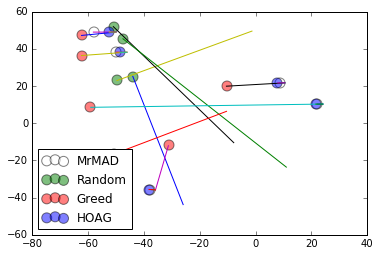

In [23]:
#plt.matshow(matrix.T)
for dataset, label, c in [(mad, 'MrMAD', 'w'), 
                         (rand, 'Random', 'g'),
                         (greed, 'Greed', 'r'),
                         (hoag, 'HOAG', 'b')
                        ]:
    first = True
    for i in dataset:
        first_value = i.history[0][0][0]
        i = i.best_values[0]
        
        first_value = np.log10(np.exp(2*first_value))*10
        i = np.log10(np.exp(2*i))*10
        if first:
            plt.scatter(i[0] + np.random.randn(1)*0.1,i[1]+ np.random.randn(1)*0.1, c=c, label=label, alpha=0.5, s=100)
            first = False
        else:
            plt.scatter(i[0]+ np.random.randn(1)*0.1,i[1]+ np.random.randn(1)*0.1, c=c, alpha=0.5, s=100)
        #print [first_value[0], i[0]],[first_value[1], i[1]]
        plt.plot([first_value[0], i[0]],[first_value[1], i[1]])
        
plt.legend(loc='best')
plt.rcParams['figure.figsize'] = (20,20)
#plt.scatter(2713%100 ,2713/100, s=1000)


In [15]:
len(mad[0].history)

51

DrMAD
([array([ 6.24791519,  4.38121878])], array(-1086886.109199603))
DrMAD
([array([-1.81573903, -1.81607672])], array(-1086791.7031492447))
DrMAD
([array([-3.18682943,  8.12646604])], array(-1086667.367342419))
DrMAD
([array([ 4.41561016,  5.91301609])], array(-1086839.385198935))
DrMAD
([array([-3.71181708,  9.57873793])], array(-1086689.0168361983))
DrMAD -1086708.23668
Случайный поиск
([array([-0.15742975,  0.8311499 ])], array(-1086781.2417623089))
Случайный поиск
([array([ 7.91414797,  4.72198598])], array(-1086734.5963877663))
Случайный поиск
([array([ 7.73560068,  7.75173247])], array(-1086813.9199742093))
Случайный поиск
([array([-1.25787755,  8.22251746])], array(-1086804.8274211327))
Случайный поиск
([array([ 4.23773551,  9.67221271])], array(-1086800.6018854803))
Случайный поиск -1086661.06229
Жадный алгоритм
([array([ 6.24791519,  4.38121878])], array(-1086787.5312925368))
Жадный алгоритм
([array([-1.81573903, -1.81607672])], array(-1086733.9162793646))
Жадный алгоритм
(

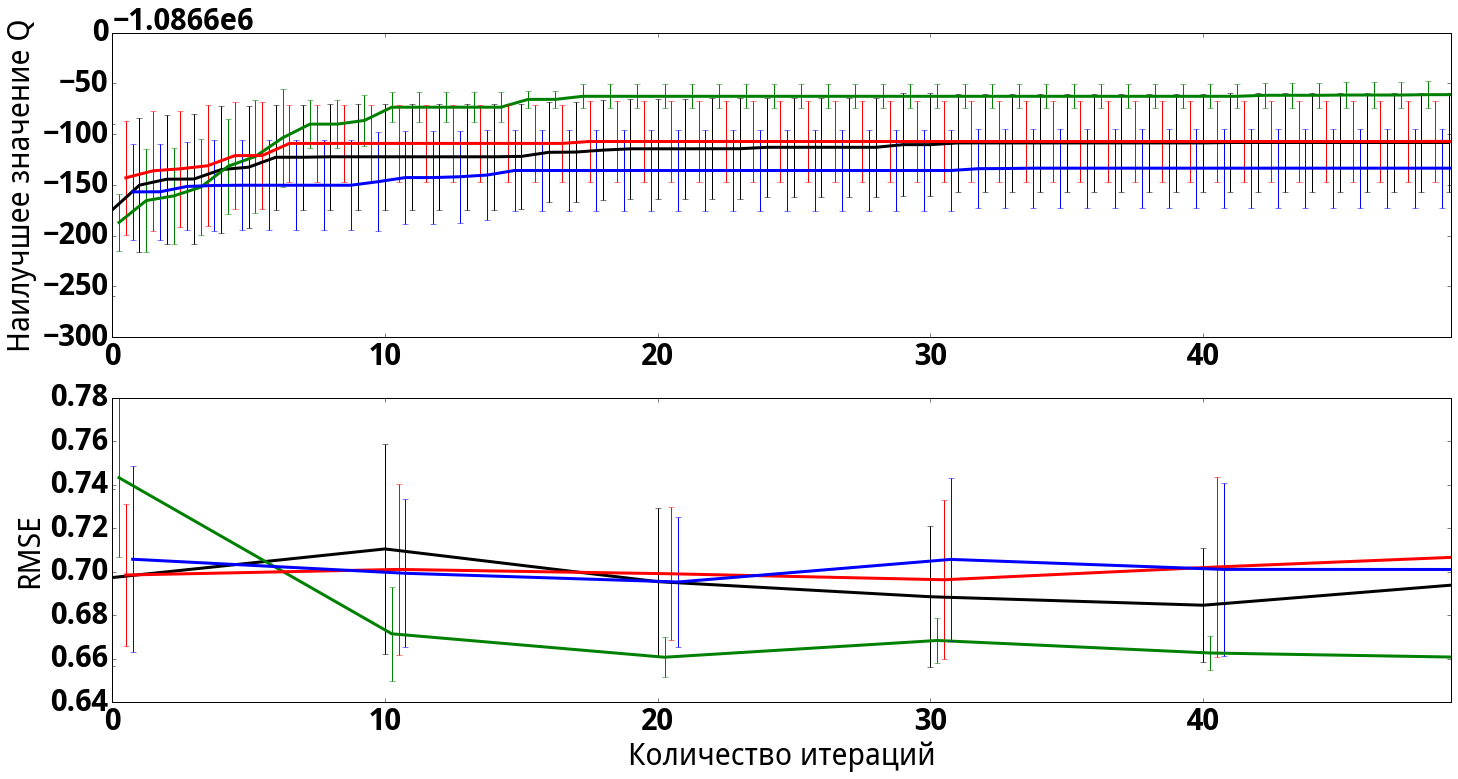

In [48]:
id = -1

font = {'family': 'Droid Sans',
        'weight': 'bold',
       'size':30}
plt.rc('font', **font)
plt.rcParams['figure.figsize'] = (24, 12)


plt.subplot(211)
for dataset, label, c in [(mad, 'DrMAD', 'k'), 
                         (rand, u'Случайный поиск', 'g'),
                         (greed, u'Жадный алгоритм', 'r'),
                         (hoag, 'HOAG', 'b')
                          ]:
    id+=1
    
    line = []
    for b in dataset:
        
        print label
        print b.history[0]
        history = []
        
        for i in xrange(0,50):
        
            best_value = max([h[1] for h in b.history[:i+1]])
            
            history.append(best_value)
        line.append(history)
    #plt.xlabel(u'Количество итераций', fontsize=30)
    plt.ylabel(u'Наилучшее значение Q', fontsize=30)
    print label,   np.mean(np.array(line)[:,-1])
    #print np.mean(line, axis=0)[-1]
    
    #plt.fill_between(range(len( np.mean(line, axis=0))),  np.mean(line, axis=0)-np.std(line, axis=0), np.mean(line, axis=0)+np.std(line, axis=0), facecolor=c, alpha=0.25 )
    plt.errorbar(np.array(range(len(line[0])))+id*1.0/4, np.mean(line, axis=0), yerr=np.std(line, axis=0), c=c, lw=1)
    plt.plot(np.array(range(len(line[0])))+id*1.0/4, np.mean(line, axis=0),  c=c, lw=3, label=label)
plt.xlim((0,49.1))
plt.subplot(212)
plt.xlabel(u'Количество итераций', fontsize=30)
plt.ylabel(u'RMSE', fontsize=30)
id = -1
with open('cv_results2.pckl','rb') as inp:
    Q,accs= cPickle.load(inp)
for dataset,label, label2,  c in [(mad, 'MrMAD', 'DrMAD', 'k'), 
                         (rand, 'Random', u'Случайный поиск', 'g'),
                         (greed,'Greed',  u'Жадный алгоритм', 'r'),
                         (hoag, 'HOAG', 'HOAG', 'b')
                          ]:
    
    k = label
    id+=1
    
    accs[k] = [[a[0]  for a in accsk ]   for accsk in accs[k]]
    
    #print accs[k]
    mean, std = np.mean(accs[k], axis=0), np.std(accs[k], axis=0)
    
    if len(mean)==5:
        #print label
        mean = mean.tolist()+[mean[4]]
        std = std.tolist()+[std[4]]
    print label,  mean
   
    
    plt.errorbar(np.array(range(len(mean)))*10+id*1.0/4, mean, yerr=std, c=c, lw=1)
    plt.plot(np.array(range(len(mean)))*10+id*1.0/4, mean,  c=c, lw=3, label=label2)
#plt.legend(loc='best')
plt.xlim((0,49.1))
#plt.legend(loc='best', bbox_to_anchor=(1.0,0.75))

plt.savefig('../../../doc/plots/wisdm_cv.png', bbox_inches='tight')

IndexError: invalid index to scalar variable.

In [13]:
import theano.tensor as T
param_num = X_train.shape[1] * 10 + 10 + 10  + 1
accs = {}
Q = {}
lr = theano.shared(10**(-6))
hid = 10
alphas = theano.shared(np.array([1.0, 1.0]))
real_alphas = T.concatenate([T.repeat(alphas[0],  X_train.shape[1] * hid + hid)   , T.repeat(alphas[1],  hid + 1) ])

optimizer = partial(gd_optimizer, learning_rate=lr)
inits = [np.sqrt(2.0/(X_train.shape[1])).astype(theano.config.floatX), np.sqrt(2.0/(10)).astype(theano.config.floatX)]

model_build = partial(build_feedforward,  structure = [X_train.shape[1],10, 1],
                      init_sigmas=inits, nonlinearity=lambda x:T.nnet.relu(x), log_alphas =real_alphas, 
                      bias=True)


training_procedure = simple_tc( model_build, optimizer, X_train, Y_train, batch_size=25 )



X_t = T.matrix()

predicts = []

for m in training_procedure.models:    
    predict = m.predict_var(X_t)
    predicts.append(theano.function([X_t], predict))
print 'start'
id = -1
for dataset, label, c in [(vmad, 'MrMAD', 'k'), 
                         (vrand, 'Random', 'g'),
                         (vgreed, 'Greed', 'r'),
                         (vhoag, 'HOAG', 'b')
                          ]:
    id+=1
    print label
    line = []
    Q[label] = []
    accs[label] = []

    for b in dataset:
        for _ in xrange(5):
            print 'start'

            Q[label].append([])
            accs[label].append([])
            history = []
            if len(b.history)==50:
                b.history = b.history+[b.history[-1]]

            for i in xrange(0, len(b.history), 10):

                best_value = np.argmax([h[1] for h in b.history[:i+1]])
                #print best_value
                best_value = b.history[best_value][0]
                #best_value = [np.array([6.0]*param_num)]

                # if i==len(b.history)-1:
                #     print best_value[0]
                for m in training_procedure.models:
                    m.respawn()

                alphas.set_value(best_value[0])
                for _ in xrange(4000):
                    training_procedure.do_train()
                #alphas.set_value(np.array([1.0, 1.0]))



                score = training_procedure.do_validation()
                res = []
                res = np.sqrt(np.mean((predicts[0](X_test)[:,0]-Y_test)**2))
                res2 = np.sqrt(np.mean((predicts[0](X_train)[:,0]-Y_train)**2))

                accs[label][-1].append((res,res2))
                Q[label][-1].append(score)
                print i,res,res2,score

KeyboardInterrupt: 

In [8]:
with open('cv_results2.pckl','wb') as out:
    cPickle.dump((Q,accs), out)

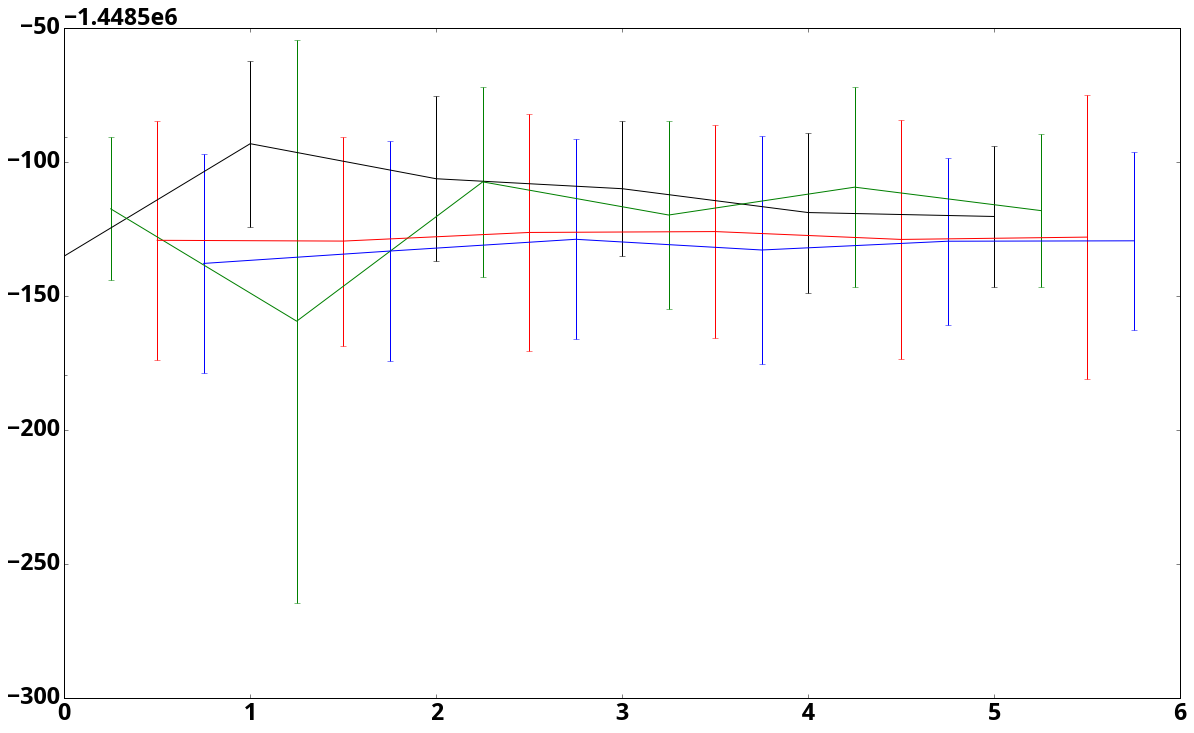

In [27]:
with open('cv_results2.pckl','rb') as inp:
    Q,accs= cPickle.load(inp)
    
    id = -1
for dataset, label, c in [(mad, 'MrMAD', 'k'), 
                         (rand, 'Random', 'g'),
                         (greed, 'Greed', 'r'),
                         (hoag, 'HOAG', 'b')
                          ]:
    k = label
    id+=1 
    mean, std = np.mean(Q[k], axis=0), np.std(Q[k], axis=0)
    plt.errorbar(np.array(range(len(mean)))+id*1.0/4, mean, yerr=std, c=c, lw=1, label=label)
    

MrMAD [ 0.69737592  0.71054314  0.69549293  0.68855207  0.684654    0.69480844]
Random [ 0.74330463  0.67150988  0.66073053  0.66843769  0.66268064  0.66057265]
Greed [ 0.69854335  0.70112393  0.69911435  0.69636694  0.70224924  0.70738831]
HOAG [ 0.70580425  0.69934602  0.69534128  0.70572825  0.70112828  0.7010934 ]


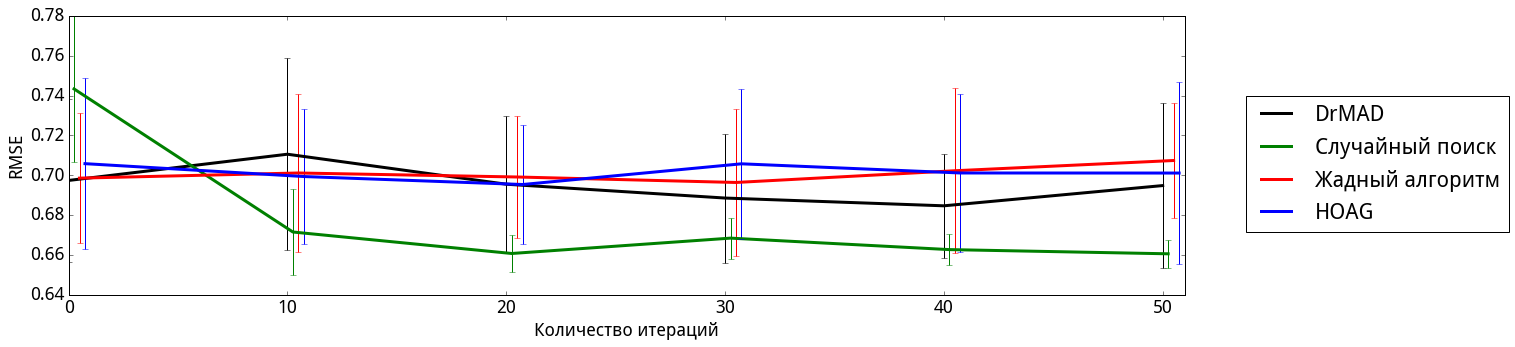

In [34]:
with open('cv_results2.pckl','rb') as inp:
    Q,accs= cPickle.load(inp)

    id = -1
    
id = -1

font = {'family': 'Droid Sans',
        'weight': 'normal',
       'size':18}
plt.rc('font', **font)
plt.rcParams['figure.figsize'] = (20, 5)
plt.xlabel(u'Количество итераций', fontsize=18)
plt.ylabel(u'RMSE', fontsize=18)


for dataset,label, label2,  c in [(mad, 'MrMAD', 'DrMAD', 'k'), 
                         (rand, 'Random', u'Случайный поиск', 'g'),
                         (greed,'Greed',  u'Жадный алгоритм', 'r'),
                         (hoag, 'HOAG', 'HOAG', 'b')
                          ]:
    
    k = label
    id+=1
    
    accs[k] = [[a[0]  for a in accsk ]   for accsk in accs[k]]
    
    #print accs[k]
    mean, std = np.mean(accs[k], axis=0), np.std(accs[k], axis=0)
    
    if len(mean)==5:
        #print label
        mean = mean.tolist()+[mean[4]]
        std = std.tolist()+[std[4]]
    print label,  mean
   
    
    plt.errorbar(np.array(range(len(mean)))*10+id*1.0/4, mean, yerr=std, c=c, lw=1)
    plt.plot(np.array(range(len(mean)))*10+id*1.0/4, mean,  c=c, lw=3, label=label2)
plt.legend(loc='best')
plt.xlim((0,51))

plt.legend(loc='best', bbox_to_anchor=(1.3,0.75))
plt.savefig('../../../doc/slide_plots/wisdm_e_cv.png')

In [ ]:
batch_size = 25
lr = theano.shared(10**(-5))
log_alphas = theano.shared(np.array([10.0]))

optimizer = partial(gd_optimizer, learning_rate=lr)
model_build = partial(build_feedforward,  structure = [X_train.shape[1], 50,   1],  init_sigmas=[0.001]*3,  nonlinearity=lambda x:T.nnet.relu(x), log_alphas=log_alphas, bias=True)
training_procedure = simple_tc( model_build, optimizer, X_train, Y_train,   batch_size=batch_size )
model = model_build(params=training_procedure.models[0].params, dataset_size=1)
X = T.matrix()
predict = theano.function([X], model.predict_var(X))

def mse(Y1, Y2):
    return np.sum((Y1 - Y2)**2)

#100 epochs, 2500/25 ~ 100 iterations
err = []
Y = predict(X_test)
err.append(mse(Y[:,0], Y_test))
for epoch in xrange(100):
    
    for i in xrange(100):
        training_procedure.do_train()
    
    Y = predict(X_test)
    err.append(mse(Y[:,0], Y_test))
    

    

In [ ]:
for dataset, label, c in [(mad, 'MrMAD', 'k'), 
                         (rand, 'Random', 'g'),
                         (greed, 'Greed', 'r'),
                         (hoag, 'HOAG', 'b')
                          ]:
    id+=1
    print label
    line = []

    for b in dataset:

        history = []
        for i in xrange(len(b.history)):

            best_value = np.max([h[1] for h in b.history[:i+1]])
            history.append(best_value)
        history = np.array(history)
        history = history[-1]/history
        history = np.where(history>=0.99)[0]
       
        line.append(np.min(history))
        

        """
        bests.append( random_optimize(partial(cv_tc, k =4,  batch_size=75), model_build, optimizer, 50, 10, X_train, Y_train,  [alphas, lr] ,
         [alpha_ranges, lr_ranges], verbose=100))
        X = T.matrix()    
        model = model_build(dataset_size=100)


        """
    print np.mean(line), np.median(line), np.std(line)

In [ ]:
for dataset, label, c in [(mad, 'MrMAD', 'k'), 
                         (rand, 'Random', 'g'),
                         (greed, 'Greed', 'r'),
                         (hoag, 'HOAG', 'b')
                          ]:
    history = []
    for b in dataset:
        best_value = np.max([h[1] for h in b.history])
        history.append(best_value)
    print label, np.mean(history), np.std(history)

In [ ]:
dataset = hoag
import theano.tensor as T
lr = theano.shared(0.01)
alphas = theano.shared(np.array([1.0, 1.0]))
optimizer = partial(gd_optimizer, learning_rate=lr)
model_build = partial(build_feedforward, structure = [2,1], nonlinearity=lambda x:x, log_alphas =alphas, bias=False)
X_train = X[:100]
Y_train = Y[:100]
X_test = X[100:]
Y_test = Y[100:]
training_procedure = simple_tc( model_build, optimizer, X_train, Y_train,  batch_size=100 )

for d in dataset:
    X_, Y_ = [], []
    for h in d.history:
        alphas.set_value(h[0][0])
        for _ in xrange(10):
              training_procedure.do_train()
        X_.append(np.linalg.norm(training_procedure.models[0].params.eval() - np.array([20, 100])))
        Y_.append(np.linalg.norm(np.exp(h[0][0]- np.array([2713%100, 2713/100]))))
    plt.scatter(np.log(X_),np.log(Y_))
    plt.plot(np.log(X_),np.log(Y_))

In [ ]:
dataset = hoag
import theano.tensor as T
lr = theano.shared(0.01)
alphas = theano.shared(np.array([1.0, 1.0]))
optimizer = partial(gd_optimizer, learning_rate=lr)
model_build = partial(build_feedforward, structure = [2,1], nonlinearity=lambda x:x, log_alphas =alphas, bias=False)
X_train = X[:100]
Y_train = Y[:100]
X_test = X[100:]
Y_test = Y[100:]
training_procedure = simple_tc( model_build, optimizer, X_train, Y_train,  batch_size=100 )

for d in dataset:
    X_, Y_ = [], []
    for h in d.history:
        alphas.set_value(h[0][0])
        for _ in xrange(10):
              training_procedure.do_train()
        X_.append(np.linalg.norm(training_procedure.models[0].params.eval() - np.array([20, 100])))
        Y_.append(h[-1])
    plt.scatter(np.log(X_),np.log(-np.array(Y_)))
    plt.plot(np.log(X_),np.log(-np.array(Y_)))

In [49]:
for dataset, label, c in [(mad, 'MrMAD', 'k'), 
                         (rand, 'Random', 'g'),
                         (greed, 'Greed', 'r'),
                         (hoag, 'HOAG', 'b')
                          ]:
    id+=1
    print label
    line = []

    for b in dataset:

        
        #for i in xrange(len(b.history)):
        track = [h[1] for h in b.history]
        track = [t-track[0] for t in track]
        best = np.max(track)
        need_value = best*0.99
        track = np.where(track>=need_value)[0]
        line.append(np.min(track))
        #best_value = np.argmax([h[1] for h in b.history])
        #line.append(best_value)
        
        #history = np.array(history)
        
        #history = history[-1]/history
        
        #history = [history[i-1]/history[i] for i in range(1, len(history))]# history#np.where(history>=0.99)[0]
        
        #history = np.where(history>=0.99)[0]
        #line.append(np.min(history))
        

        """
        bests.append( random_optimize(partial(cv_tc, k =4,  batch_size=75), model_build, optimizer, 50, 10, X_train, Y_train,  [alphas, lr] ,
         [alpha_ranges, lr_ranges], verbose=100))
        X = T.matrix()    
        model = model_build(dataset_size=100)


        """
        
    print np.mean(line), np.std(line)

MrMAD
29.2 7.95989949685
Random
22.0 19.1311264697
Greed
15.4 17.2
HOAG
28.2 7.13862731903


In [28]:
greed[0].history

[([array([ 6.24791519,  4.38121878])], array(-1086787.5312925368)),
 ([array([ 6.24791511,  4.38121605])], array(-1086830.8153414736)),
 ([array([ 6.24791507,  4.38121475])], array(-1086777.814288526)),
 ([array([ 6.24791499,  4.38121196])], array(-1086830.4703362384)),
 ([array([ 6.24791493,  4.38120997])], array(-1086794.6137183732)),
 ([array([ 6.24791487,  4.38120792])], array(-1086796.830378974)),
 ([array([ 6.24791484,  4.38120726])], array(-1086754.1848066787)),
 ([array([ 6.24791476,  4.38120415])], array(-1086873.6774528236)),
 ([array([ 6.24791469,  4.3812017 ])], array(-1086800.399431232)),
 ([array([ 6.24791461,  4.38119844])], array(-1086830.9684009068)),
 ([array([ 6.24791455,  4.38119604])], array(-1086782.260205973)),
 ([array([ 6.24791449,  4.38119399])], array(-1086800.4790098288)),
 ([array([ 6.24791444,  4.38119222])], array(-1086810.7559638734)),
 ([array([ 6.24791436,  4.38118894])], array(-1086810.9870336559)),
 ([array([ 6.24791427,  4.38118551])], array(-108683

In [11]:
sigma = 0.25
print 'SIGMA is', sigma
import theano.tensor as T
param_num = X_train.shape[1] * 10 + 10 + 10  + 1
accs = {}
Q = {}
lr = theano.shared(np.array(10**(-6)).astype(np.float32))
hid = 10
alphas = theano.shared(np.array([1.0, 1.0]).astype(np.float32))
real_alphas = T.concatenate([T.repeat(alphas[0],  X_train.shape[1] * hid + hid)   , T.repeat(alphas[1],  hid + 1) ])

optimizer = partial(gd_optimizer, learning_rate=lr)
inits = [np.sqrt(2.0/(X_train.shape[1])).astype(theano.config.floatX),
         np.sqrt(2.0/(10)).astype(theano.config.floatX)]

model_build = partial(build_feedforward,  structure = [X_train.shape[1],10, 1],
                      init_sigmas=inits, nonlinearity=lambda x:T.nnet.relu(x), log_alphas =real_alphas, 
                      bias=True)


training_procedure = simple_tc( model_build, optimizer, X_train.astype(np.float32), Y_train.astype(np.float32), batch_size=25 )



X_t = T.matrix()

predicts = []

for m in training_procedure.models:    
    predict = m.predict_var(X_t)
    predicts.append(theano.function([X_t], predict))
print 'start'
id = -1
for dataset, label, c in [(mad, 'MrMAD', 'k'), 
                         (rand, 'Random', 'g'),
                         (greed, 'Greed', 'r'),
                         (hoag, 'HOAG', 'b')
                          ]:
    id+=1
    print label
    line = []
    Q[label] = []
    accs[label] = []

    for b in dataset:
        for _ in xrange(5):
            print 'start'

            history = []
            if len(b.history)==50:
                b.history = b.history+[b.history[-1]]


            best_value = np.argmax([h[1] for h in b.history])
            
            best_value = b.history[best_value][0]
            #best_value = [np.array([6.0]*param_num)]

            # if i==len(b.history)-1:
            #     print best_value[0]
            for m in training_procedure.models:
                m.respawn()

            alphas.set_value(np.array(best_value[0]).astype(np.float32))
            for _ in xrange(4000):
                training_procedure.do_train()
            #alphas.set_value(np.array([1.0, 1.0]))


            params = training_procedure.models[0].params.eval()
            for _ in xrange(10):
                training_procedure.models[0].params.set_value(params)
                res = np.sqrt(np.mean((predicts[0]((X_test+np.random.randn(*X_test.shape)*sigma).astype(np.float32))[:,0]-Y_test)**2))
            

                accs[label].append((res))
            
                

SIGMA is 0.25
start
MrMAD
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
Random
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
Greed
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
HOAG
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start


In [12]:
for k in accs:
    print k, np.mean(accs[k])

Random 0.670798941308
MrMAD 0.708624399827
Greed 0.72389790607
HOAG 0.723718660855
